In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
import pandas as pd
import os
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.stats import poisson, norm
from scipy.signal import find_peaks
from matplotlib import colors

In [2]:
data= open('PoXexp2.txt', 'r') 
x = []
y = []
for line in data:
    p = line.split()
    angle = (p[0])
    psd = p[1]
    x.append(float(angle[:-1]))
    y.append(float(psd[:-1]))

In [3]:
plt.rcParams.update({
"image.origin": "lower",
"image.aspect": 1,
"text.usetex": True,
"grid.alpha": .5,
}) 
plt.style.use('ggplot')

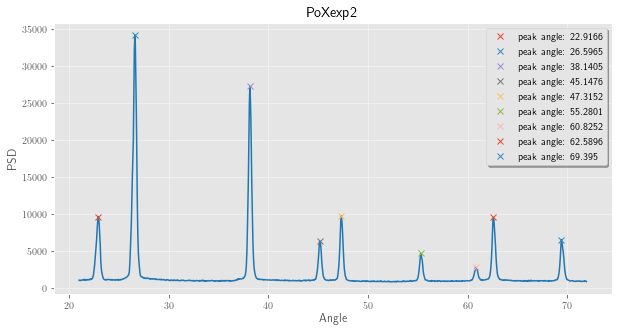

In [19]:
peaks, _ = find_peaks(y, height=1500)
plt.figure(figsize=(10,5))
plt.plot(x,y,c='tab:blue')
plt.ylabel('PSD')
plt.xlabel('Angle')
plt.title('PoXexp2')
for i in peaks: plt.plot(x[i],y[i],"x", label="peak angle: "+str(x[i]))
plt.legend(fancybox=True, shadow=True);

In [5]:
angles=[math.radians(x[i]/2) for i in peaks]
dAA=[1.54184/(np.sin(j)*2) for j in angles]
print(dAA)

[3.8807037433803284, 3.351534459398889, 2.3595219215348746, 2.0082677298232956, 1.9211999098390289, 1.6617685677610314, 1.5228848696599375, 1.4841323011376468, 1.3542882733624568]


In [6]:
hkl=[[1,0,0],[1,1,0],[1,1,1],[2,0,0],[2,1,0],[2,1,1],[2,2,0],[3,0,0],[3,1,0],[3,1,1],[2,2,2],[3,2,0],[3,2,1],
     [4,0,0],[4,1,0],[4,1,1],[3,3,1],[4,2,0],[4,2,1],[3,3,2],[4,2,2],[5,0,0]]

In [7]:
m=0
hkl2=[]
for i in hkl:
    j=0
    for j in i: 
        m+=j**2
    hkl2.append(m)
    m=0
print(hkl2)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25]


In [8]:
def cubic(d,par):
    return d*np.sqrt(par[0]**2+par[1]**2+par[2]**2)

In [9]:
def m (a, daa):
    return (a/daa)**2
for daa in dAA: 
   # print(daa, m(cubic(dAA[0],hkl[2]),daa),round(m(cubic(dAA[0],hkl[2]),daa)), int(m(cubic(dAA[0],hkl[2]),daa)))
   # print(hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa))))
    print(daa, hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))])

3.8807037433803284 [1, 1, 1]
3.351534459398889 [2, 0, 0]
2.3595219215348746 [2, 2, 0]
2.0082677298232956 [3, 1, 1]
1.9211999098390289 [2, 2, 2]
1.6617685677610314 [4, 0, 0]
1.5228848696599375 [3, 3, 1]
1.4841323011376468 [4, 2, 1]
1.3542882733624568 [5, 0, 0]


In [14]:
def m (a, daa):
    return (a/daa)**2
a=[]
for daa in dAA[:-1]: 
    #print()
    #print(daa, m(cubic(dAA[0],hkl[2]),daa),round(m(cubic(dAA[0],hkl[2]),daa)), int(m(cubic(dAA[0],hkl[2]),daa)))

    if daa>3.35:a.append(cubic(daa,hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))]))
    else:a.append(cubic(daa,hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))]))
   # print(daa, hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),daa)))])

In [16]:
#print(a)
print(np.mean(a),np.std(a))

6.687575894583436 0.050428812532865165


6.721576052657462


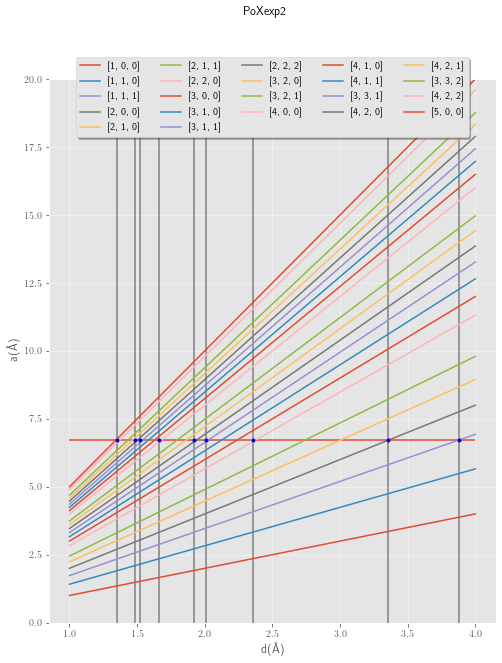

In [18]:
dlista=np.linspace(1,4,1000)
plt.figure(figsize=(8,10))
for i in range(len(hkl)):
    plt.plot(dlista,cubic(dlista,hkl[i]),label=str(hkl[i]))
    #plt.hlines(cubic(dAA[-1],hkl[i]),1,4)
plt.ylabel("a(\AA)")
plt.xlabel("d(\AA)")
for i in (dAA):
    plt.vlines(i,0,20, colors="tab:gray")
    plt.plot(i,cubic(dAA[0],hkl[2]),'b.')

plt.hlines(cubic(dAA[0],hkl[2]),1,4)
plt.suptitle("PoXexp2")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=5, fancybox=True, shadow=True)
plt.ylim(0,20)
print(cubic(dAA[0],hkl[2]))
#for i in dAA: print(cubic(i,hkl[2]))

3.8807037433803284
3.351534459398889


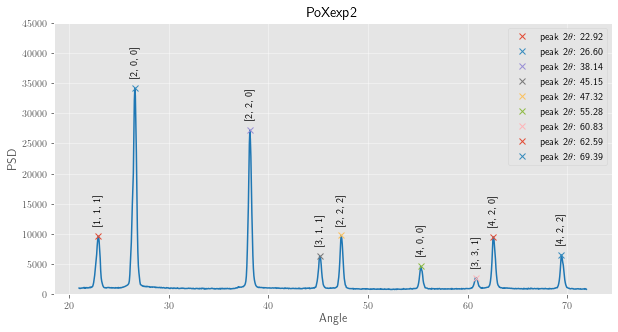

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x,y,c='tab:blue')
plt.ylabel('PSD')
plt.xlabel('Angle')
plt.title('PoXexp2')
plt.ylim(0,45000);
for i in peaks:
    plt.plot(x[i],y[i],"x", label="peak 2$\\theta$: {:.2f}".format(x[i]))
    plt.legend()
   
    if i<120:    
         print(1.54184/(np.sin(math.radians(x[i]/2))*2))
         plt.text(x[i],y[i]+2000,str(hkl[hkl2.index(round(m(cubic(dAA[0],hkl[2]),1.54184/(np.sin(math.radians(x[i]/2))*2))))]),ha='center',rotation=90)
    else: plt.text(x[i],y[i]+2000,str(hkl[hkl2.index(int(m(cubic(dAA[0],hkl[2]),1.54184/(np.sin(math.radians(x[i]/2))*2))))]),ha='center',rotation=90)

In [12]:
!jupyter nbconvert --to html --no-input raiox_hkl2.ipynb

[NbConvertApp] WARNING | pattern 'raiox_hkl2.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout